In [9]:
import time, json, requests
import pandas as pd



In [ ]:
url = 'https://view.inews.qq.com/g2/getOnsInfo?name=disease_h5&callback=&_=%d'%int(time.time()*1000)
data = json.loads(requests.get(url=url).json()['data'])

In [3]:
data.keys()

dict_keys(['lastUpdateTime', 'chinaTotal', 'chinaAdd', 'isShowAdd', 'chinaDayList', 'chinaDayAddList', 'areaTree', 'articleList'])

In [31]:
d = data['areaTree'][0]['children']
d

[{'name': '湖北',
  'today': {'confirm': 2147,
   'suspect': 0,
   'dead': 0,
   'heal': 0,
   'isUpdated': True},
  'total': {'confirm': 27100,
   'suspect': 0,
   'dead': 780,
   'heal': 1506,
   'showRate': True,
   'deadRate': 2.88,
   'healRate': 5.56},
  'children': [{'name': '武汉',
    'today': {'confirm': 1379,
     'suspect': 0,
     'dead': 0,
     'heal': 0,
     'isUpdated': True},
    'total': {'confirm': 14982,
     'suspect': 0,
     'dead': 608,
     'heal': 877,
     'showRate': True,
     'deadRate': 4.06,
     'healRate': 5.85}},
   {'name': '孝感',
    'today': {'confirm': 123,
     'suspect': 0,
     'dead': 0,
     'heal': 0,
     'isUpdated': True},
    'total': {'confirm': 2436,
     'suspect': 0,
     'dead': 29,
     'heal': 50,
     'showRate': True,
     'deadRate': 1.19,
     'healRate': 2.05}},
   {'name': '黄冈',
    'today': {'confirm': 100,
     'suspect': 0,
     'dead': 0,
     'heal': 0,
     'isUpdated': True},
    'total': {'confirm': 2141,
     'suspect'

In [57]:
p={}
p['updatetime']=data['lastUpdateTime']
print(data['chinaTotal'])
print(data['chinaAdd'])
p['chinaTotal']=data['chinaTotal']
p['chinaAdd']=data['chinaAdd']
'''for k in data['chinaTotal'].keys():
        p['total_'+k]=data['chinaTotal'][k]
for k in data['chinaAdd'.keys():
        p['add_'+k]=data['chinaAdd'[k]'''
f=open('feiyan_new.json','w',encoding='utf-8')
print(p)
json.dump(p,f,ensure_ascii=False)


{'confirm': 37290, 'suspect': 28942, 'dead': 813, 'heal': 2894}
{'confirm': 2744, 'suspect': 1285, 'dead': 91, 'heal': 844}
{'updatetime': '2020-02-09 21:59:54', 'chinaTotal': {'confirm': 37290, 'suspect': 28942, 'dead': 813, 'heal': 2894}, 'chinaAdd': {'confirm': 2744, 'suspect': 1285, 'dead': 91, 'heal': 844}}


In [66]:
from urllib import request,parse
import gzip
import json,datetime
#from lxml import etree
import requests
f=open('feiyan_new.json')
msg=json.load(f)
msgstr=json.dumps(msg)
url='https://qyapi.weixin.qq.com/cgi-bin/webhook/send?key=5829e5bc-5bdb-4923-bfc0-8283da00c72c'
headers = {
  'User-Agent': r'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/75.0.3770.100 Safari/537.36',
  'Accept': '*/*',
  'Content-Type': 'application/json'
}
postmsg={"msgtype": "text",
         "text": {"content": msgstr} }
postmsg2 = json.dumps(postmsg)
#data = parse.quote(postmsg2).encode(encoding='utf-8')
#req=request.Request(url, headers=headers, data=data)
response = requests.post(url,postmsg2)

In [64]:
postmsg2

'{"msgtype": "text", "text": {"content": "{\\"updatetime\\": \\"2020-02-09 21:59:54\\", \\"chinaTotal\\": {\\"confirm\\": 37290, \\"suspect\\": 28942, \\"dead\\": 813, \\"heal\\": 2894}, \\"chinaAdd\\": {\\"confirm\\": 2744, \\"suspect\\": 1285, \\"dead\\": 91, \\"heal\\": 844}}"}}'

In [19]:
updatetime=data['lastUpdateTime']
chinadaylist=pd.DataFrame(data['chinaDayList'])
chinadaylist['date']=pd.to_datetime('2020.'+chinadaylist['date'], format='%Y.%m.%d')
chinadaylist=chinadaylist.set_index('date')

In [25]:
chinadaylist.to_csv('chinadaylist'+updatetime.replace(':','-')+'.csv')

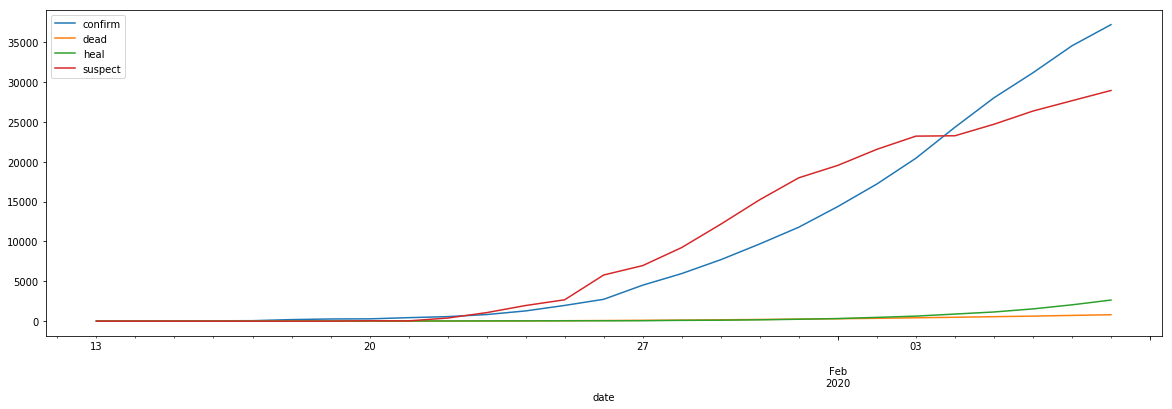

In [22]:
chinadaylist.plot(subplots=False, figsize=(20,6))

In [30]:

chinadayaddlist=pd.DataFrame(data['chinaDayAddList'])
chinadayaddlist['date']=pd.to_datetime('2020.'+chinadayaddlist['date'], format='%Y.%m.%d')
chinadayaddlist=chinadayaddlist.set_index('date')
chinadayaddlist.to_csv('chinadayaddlist'+updatetime.replace(':','-')+'.csv')
chinadayaddlist

,confirm,dead,deadRate,heal,healRate,suspect
date,,,,,,
2020-01-20,77,0,0.0,0,0.0,27
2020-01-21,149,3,2.0,0,0.0,53
2020-01-22,131,8,6.1,0,0.0,257
2020-01-23,259,8,3.1,6,2.3,680
2020-01-24,444,16,3.6,3,0.7,1118
2020-01-25,688,15,2.2,11,1.6,1309
2020-01-26,769,24,3.1,2,0.3,3806
2020-01-27,1771,26,1.5,9,0.5,2077
2020-01-28,1459,26,1.8,43,2.9,3248


In [38]:
fname='arealist'+updatetime.replace(':','-')+'.json'

f = open(fname,'w',encoding='utf-8')
json.dump(d,f,ensure_ascii=False)
d

[{'name': '湖北',
  'today': {'confirm': 2147,
   'suspect': 0,
   'dead': 0,
   'heal': 0,
   'isUpdated': True},
  'total': {'confirm': 27100,
   'suspect': 0,
   'dead': 780,
   'heal': 1506,
   'showRate': True,
   'deadRate': 2.88,
   'healRate': 5.56},
  'children': [{'name': '武汉',
    'today': {'confirm': 1379,
     'suspect': 0,
     'dead': 0,
     'heal': 0,
     'isUpdated': True},
    'total': {'confirm': 14982,
     'suspect': 0,
     'dead': 608,
     'heal': 877,
     'showRate': True,
     'deadRate': 4.06,
     'healRate': 5.85}},
   {'name': '孝感',
    'today': {'confirm': 123,
     'suspect': 0,
     'dead': 0,
     'heal': 0,
     'isUpdated': True},
    'total': {'confirm': 2436,
     'suspect': 0,
     'dead': 29,
     'heal': 50,
     'showRate': True,
     'deadRate': 1.19,
     'healRate': 2.05}},
   {'name': '黄冈',
    'today': {'confirm': 100,
     'suspect': 0,
     'dead': 0,
     'heal': 0,
     'isUpdated': True},
    'total': {'confirm': 2141,
     'suspect'

In [40]:
df=pd.DataFrame(d)

In [51]:
provlist=[]
for prov in d:
    p={}
    p['date']=updatetime
    p['name']=prov['name']
    for k in prov['today'].keys():
        p['today_'+k]=prov['today'][k]
    for k in prov['total'].keys():
        p['total_'+k]=prov['total'][k]
    provlist.append(p)
    #print(p)
x=pd.DataFrame(provlist)
x.to_csv('provlist'+updatetime.replace(':','-')+'.csv')

In [52]:
citylist=[]
for prov in d:
    cityrecord={}
    cityrecord['date']=updatetime
    cityrecord['provname']=prov['name']
    for city in prov['children']:
        cityrecord['name']=city['name']
        for k in city['today'].keys():
            cityrecord['today_'+k]=city['today'][k]
        for k in city['total'].keys():
            cityrecord['total_'+k]=city['total'][k]
    citylist.append(cityrecord)
    #print(p)
x=pd.DataFrame(citylist)
x.to_csv('citylist'+updatetime.replace(':','-')+'.csv')